In [90]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import folium
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from scipy.stats import linregress


In [91]:
df = pd.read_csv('complete_data_EM_3.csv')

df.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Records,Artist_clean,Album,Continent,Country,Rank
0,1,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Australia,Australia,23
1,2,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Austria,5
2,3,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Belgium,8
3,4,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Bulgaria,1
4,5,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,North America,Canada,12


In [92]:
df['Rank'].nunique

<bound method IndexOpsMixin.nunique of 0       23
1        5
2        8
3        1
4       12
        ..
2197     3
2198    37
2199    44
2200    46
2201    48
Name: Rank, Length: 2202, dtype: int64>

In [93]:
df_rank = df.query('Rank < 11')

df_rank.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Records,Artist_clean,Album,Continent,Country,Rank
1,2,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Austria,5
2,3,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Belgium,8
3,4,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Bulgaria,1
5,6,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Czech Republic,3
6,7,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Denmark,7


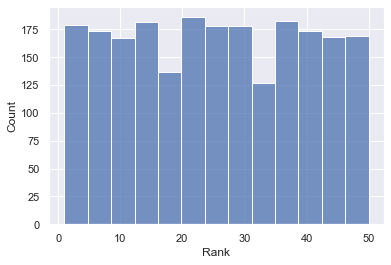

In [94]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=df, x="Rank")
plt.show();

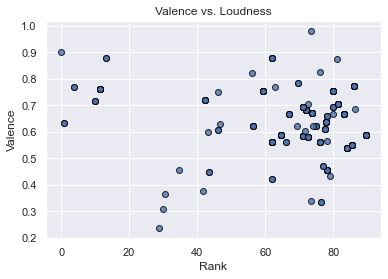

In [95]:
plt.scatter(df_rank["Popularity"],
            df_rank["Energy"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Artist")

plt.title(f'Valence vs. Loudness')
plt.ylabel("Valence")
plt.xlabel("Rank")
plt.grid(True)

# plt.savefig("Latitude vs Temperature (F).png")

plt.show()

The r-squared is: 0.005403581200773668


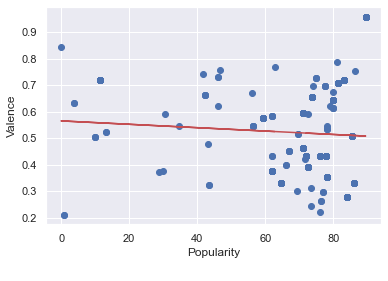

In [107]:
x_values = df_rank['Popularity']
y_values = df_rank['Valence']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('Valence')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [108]:
df.columns

Index(['Unnamed: 0', 'Acousticness', 'Danceability', 'Duration Ms', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Popularity', 'Speechiness',
       'Tempo', 'Valence', 'Explicit', 'Records', 'Artist_clean', 'Album',
       'Continent', 'Country', 'Rank'],
      dtype='object')

In [190]:
df_country_cont = df_rank[['Continent','Country','Acousticness', 'Danceability', 'Duration Ms', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Popularity', 'Speechiness',
       'Tempo', 'Valence', 'Explicit',]]

df_country_cont = df_country_cont.groupby(['Country',]).mean()

df_country_cont.reset_index()


df_country_cont.head(50)


,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit
Country,,,,,,,,,,,,
Argentina,0.230130,0.788598,210456.433086,0.658825,0.000248,0.132479,-4.775223,70.497963,0.119530,128.319877,0.664361,0.448210
Australia,0.177392,0.719125,207097.042130,0.642492,0.001575,0.213535,-5.970151,71.711111,0.127020,118.228371,0.534455,0.538016
Austria,0.146579,0.706678,199392.380036,0.661740,0.002514,0.222627,-6.494229,71.579212,0.168273,119.363542,0.453838,0.760466
Belgium,0.181817,0.726764,199172.923570,0.666083,0.001876,0.206602,-6.210259,68.516559,0.151513,118.782613,0.496916,0.523526
Bolivia,0.303299,0.749328,237837.461639,0.645104,0.000733,0.144015,-5.526982,70.341378,0.127058,133.087560,0.630675,0.538860
Brazil,0.079378,0.696809,235610.531915,0.753809,0.001748,0.211655,-4.970957,59.340426,0.056194,119.323766,0.577213,0.148936
Bulgaria,0.159799,0.724314,201447.976516,0.633599,0.001874,0.194445,-6.427780,69.908780,0.153874,121.841150,0.455178,0.838967
Canada,0.214974,0.721691,197693.296892,0.598906,0.001568,0.222795,-6.886085,71.220851,0.136158,118.973949,0.446032,0.759445
Chile,0.256380,0.774166,232313.091481,0.653982,0.000184,0.135235,-5.414334,71.088519,0.126878,125.176463,0.493861,0.703519


In [184]:
df_country_cont.columns

Index(['Acousticness', 'Danceability', 'Duration Ms', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Popularity', 'Speechiness',
       'Tempo', 'Valence', 'Explicit'],
      dtype='object')

The r-squared is: 0.03547623651451005


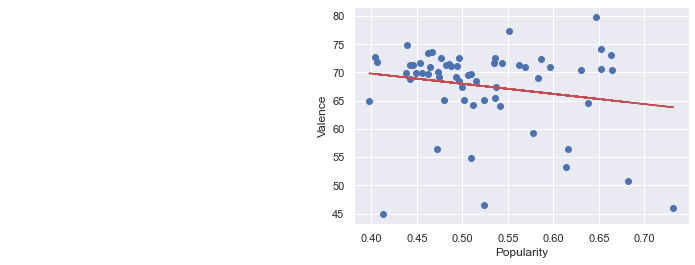

In [191]:
x_values = df_country_cont['Valence']
y_values = df_country_cont['Popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.10274161293471054


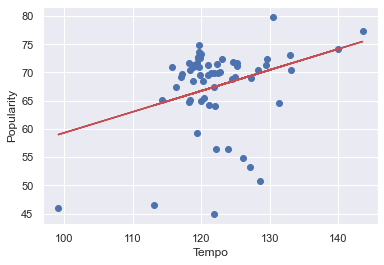

In [194]:
x_values = df_country_cont['Tempo']
y_values = df_country_cont['Popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,40),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.031701428805754904


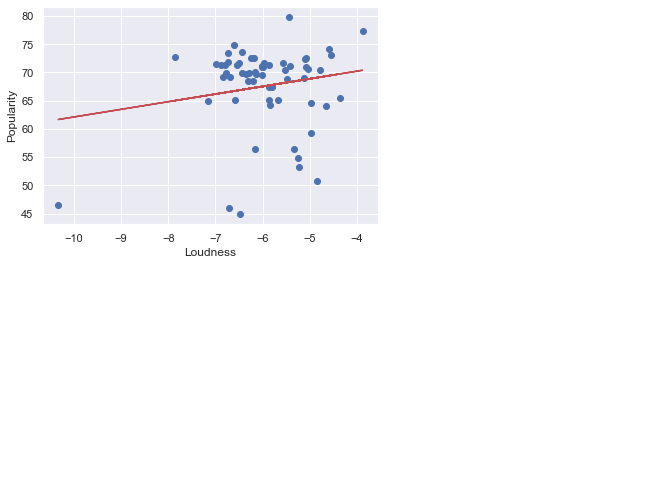

In [195]:
x_values = df_country_cont['Loudness']
y_values = df_country_cont['Popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Loudness')
plt.ylabel('Popularity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [172]:
df_country_cont['Rank'].count

<bound method Series.count of Continent      Country     
Africa         South Africa    25.347826
Asia           Hong Kong       29.375000
               India           23.034483
               Indonesia       23.666667
               Israel          22.448276
                                 ...    
South America  Colombia        25.866667
               Ecuador         25.760870
               Paraguay        25.377778
               Peru            25.363636
               Uruguay         25.550000
Name: Rank, Length: 62, dtype: float64>